In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_validate,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, svm
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import chisquare
from scipy import stats
import seaborn
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.cluster import KMeans, DBSCAN
from sklearn.feature_selection import chi2, SelectKBest, SelectFdr
from sklearn.decomposition import PCA
from rake_nltk import Rake

Import data as data frame

In [36]:
# dataPath = "/mnt/c/Users/LJUDY/OneDrive/MyStuff/Work/FedEx/Shift Lead/Clustering Project/"
simplefile = "problems_2categories.csv"

data = pd.read_csv(simplefile)
data.head()

,Assignment group,Business service,Category,Company,Created Time,Created by,Has Parent,Impact,Major Problem,Opened by,Priority,Problem Manager,Reassignment count,Related Incidents,Type,Updates,Urgency
0,FSC_ITL3O2STIBCO,Computer,Application,Other,afternoon,Other,False,3,False,Naveen Kumar,5,Naveen Kumar,1,15,Standard,19,3
1,Other,Computer,Application,FedEx Services,evening,ID3667964,True,3,True,DZundra Green,5,Mark Duncan,2,10,ITCC,32,3
2,FSC_ITL3O2STIBCO,Computer,Application,Other,afternoon,ID5069733,True,3,False,Admin-Arturo Reyes,5,Naveen Kumar,0,10,Standard,33,3
3,Other,Server,Application,FedEx Services,evening,ID5305519,True,3,True,Ashish Bisht,5,Christophe Gurley,2,9,ITCC,24,3
4,Other,Network,Application,FedEx Services,morning,Other,True,3,True,Brad Moore,5,Michael Kennemer,2,6,ITCC,27,3


In [ ]:
data.columns

## Exploratory Data Analysis

In [ ]:
seaborn.catplot(x="Type", y="Impact", hue="Category", kind="bar", data=data);

In [4]:
durations = pd.read_csv('problems_durations.csv')

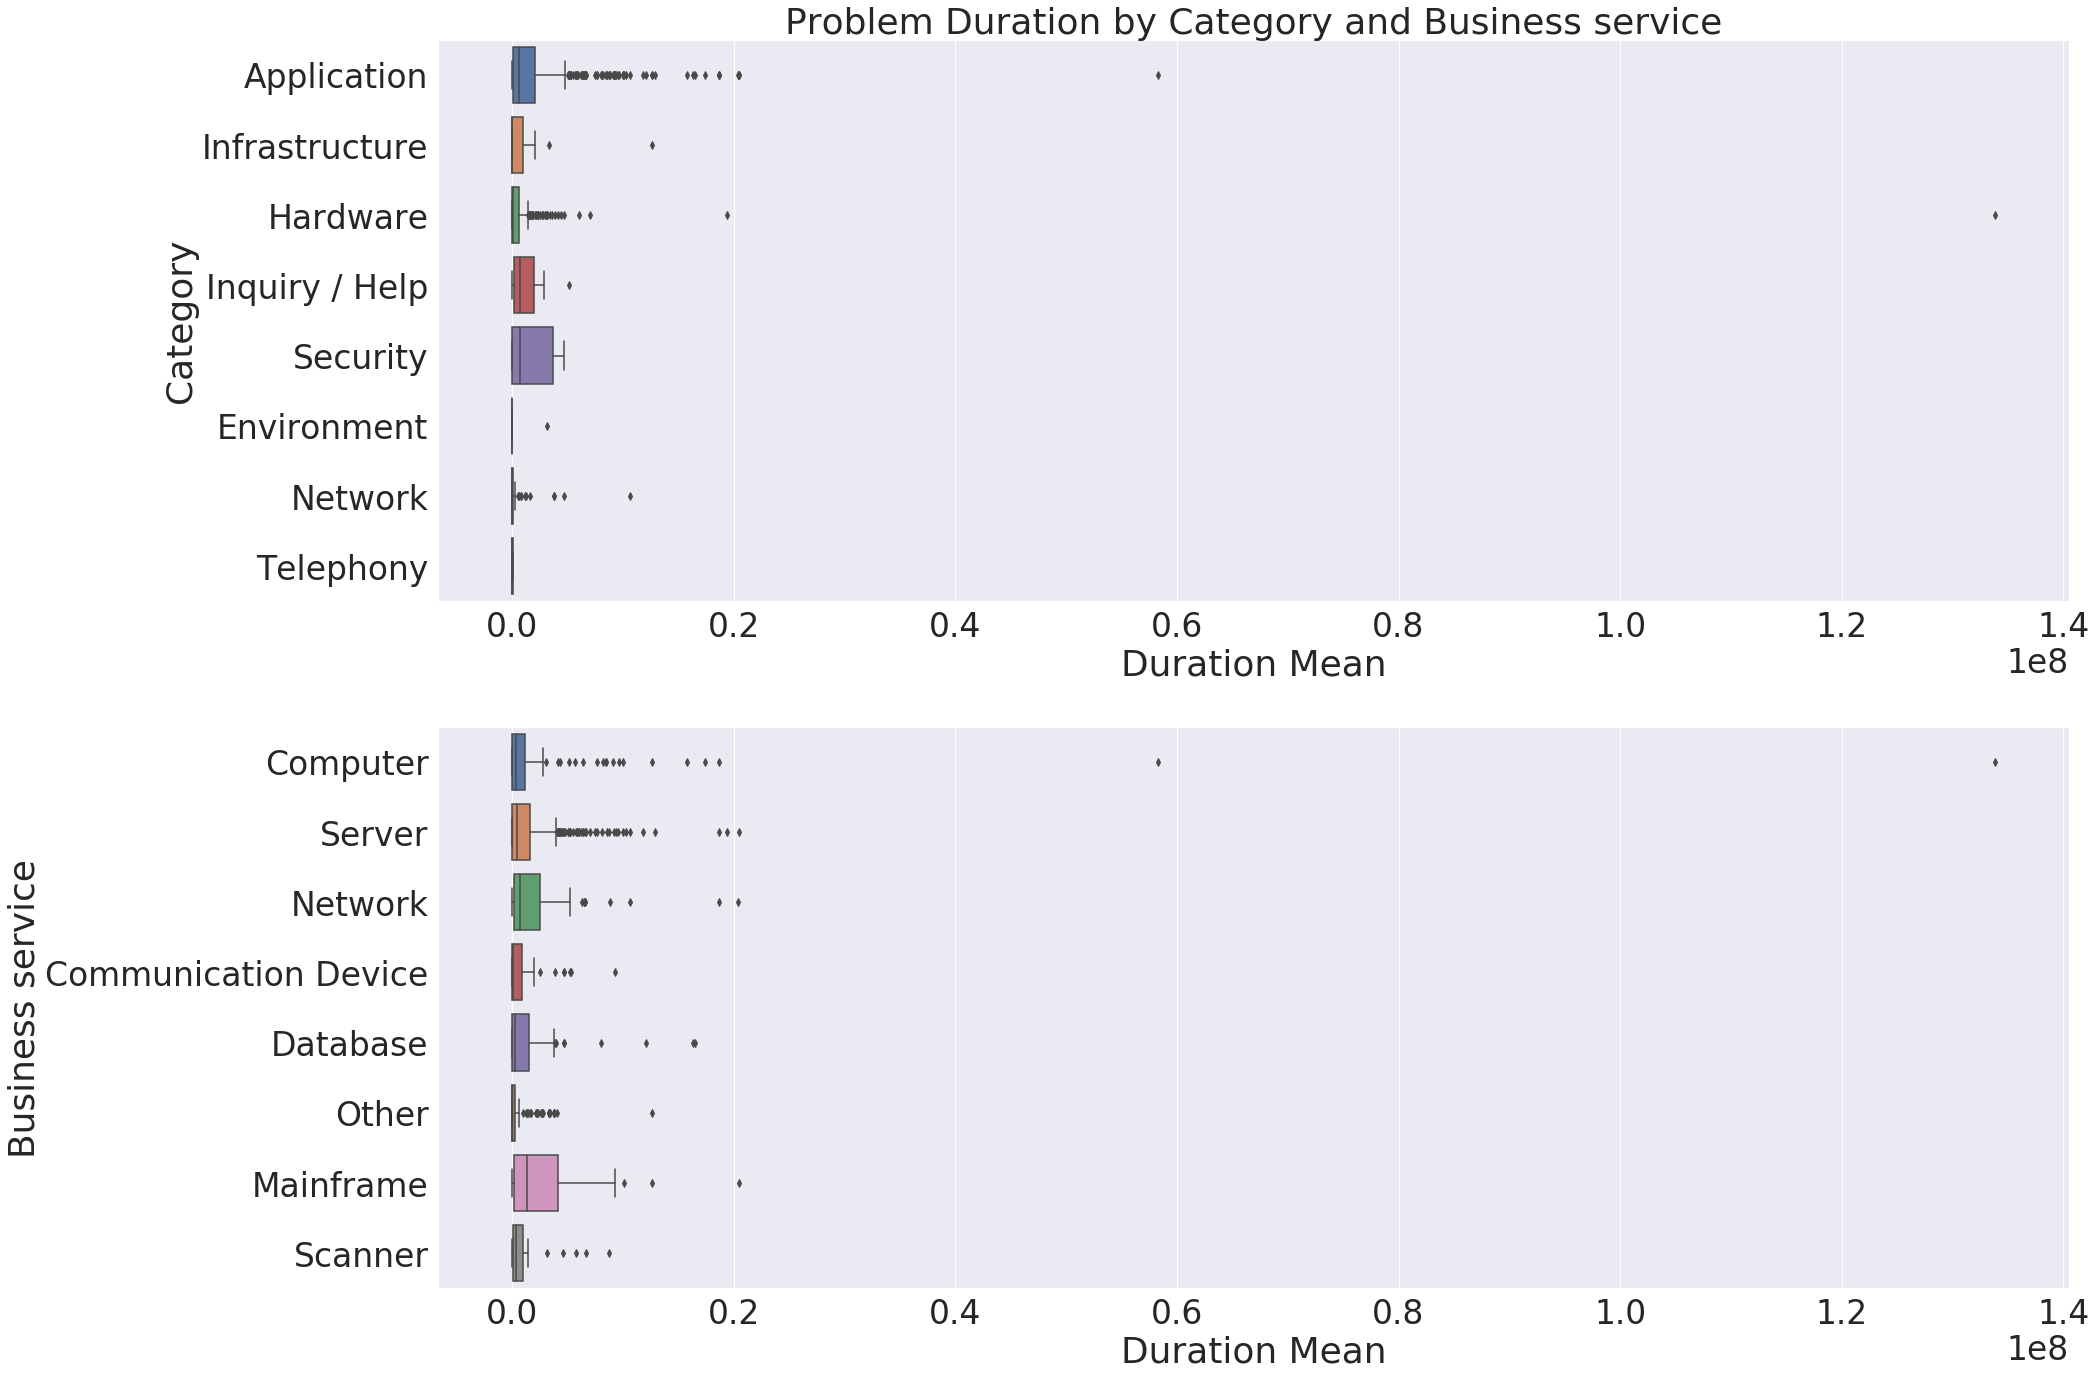

In [8]:
rcParams.update({'figure.autolayout': True})
seaborn.set(font_scale=3)
fig, ax = plt.subplots(2,1)
plt.subplots_adjust(wspace=.5, hspace=.2)
fig.set_figwidth(30)
fig.set_figheight(20)
# plt.set_yscale('log')
g1 = seaborn.boxplot('Duration Mean', 'Category', data=durations, ax=ax[0])
# g1.set_xscale('log')
g1.set_title('Problem Duration by Category and Business service')
g2 = seaborn.boxplot('Duration Mean', 'Business service', data=durations, ax=ax[1])
# g2.set_xscale('log')
plt.savefig("DurationByCat-Service.png")

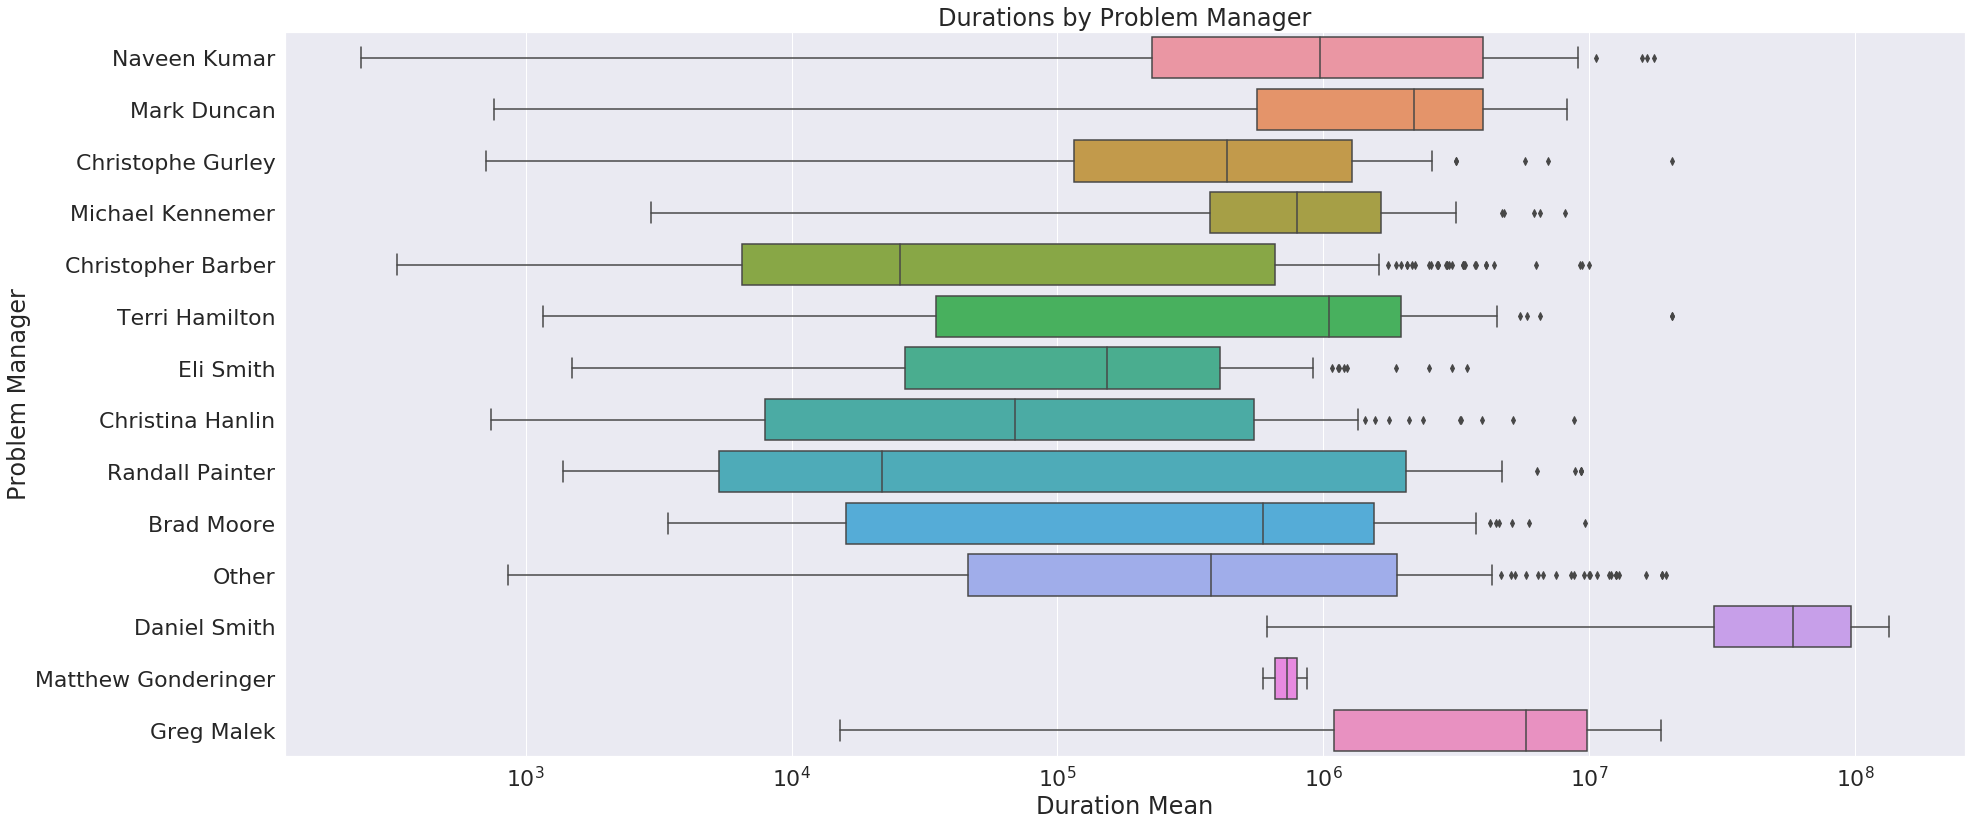

In [10]:
seaborn.set(font_scale=2)
fig, ax = plt.subplots()
plt.subplots_adjust(wspace=.5, hspace=.2)
fig.set_figwidth(28)
fig.set_figheight(12)
g = seaborn.boxplot('Duration Mean', 'Problem Manager', data=durations)
g.set_xscale('log')
plt.title('Durations by Problem Manager')
plt.savefig("DurationByManager-logscale.png")

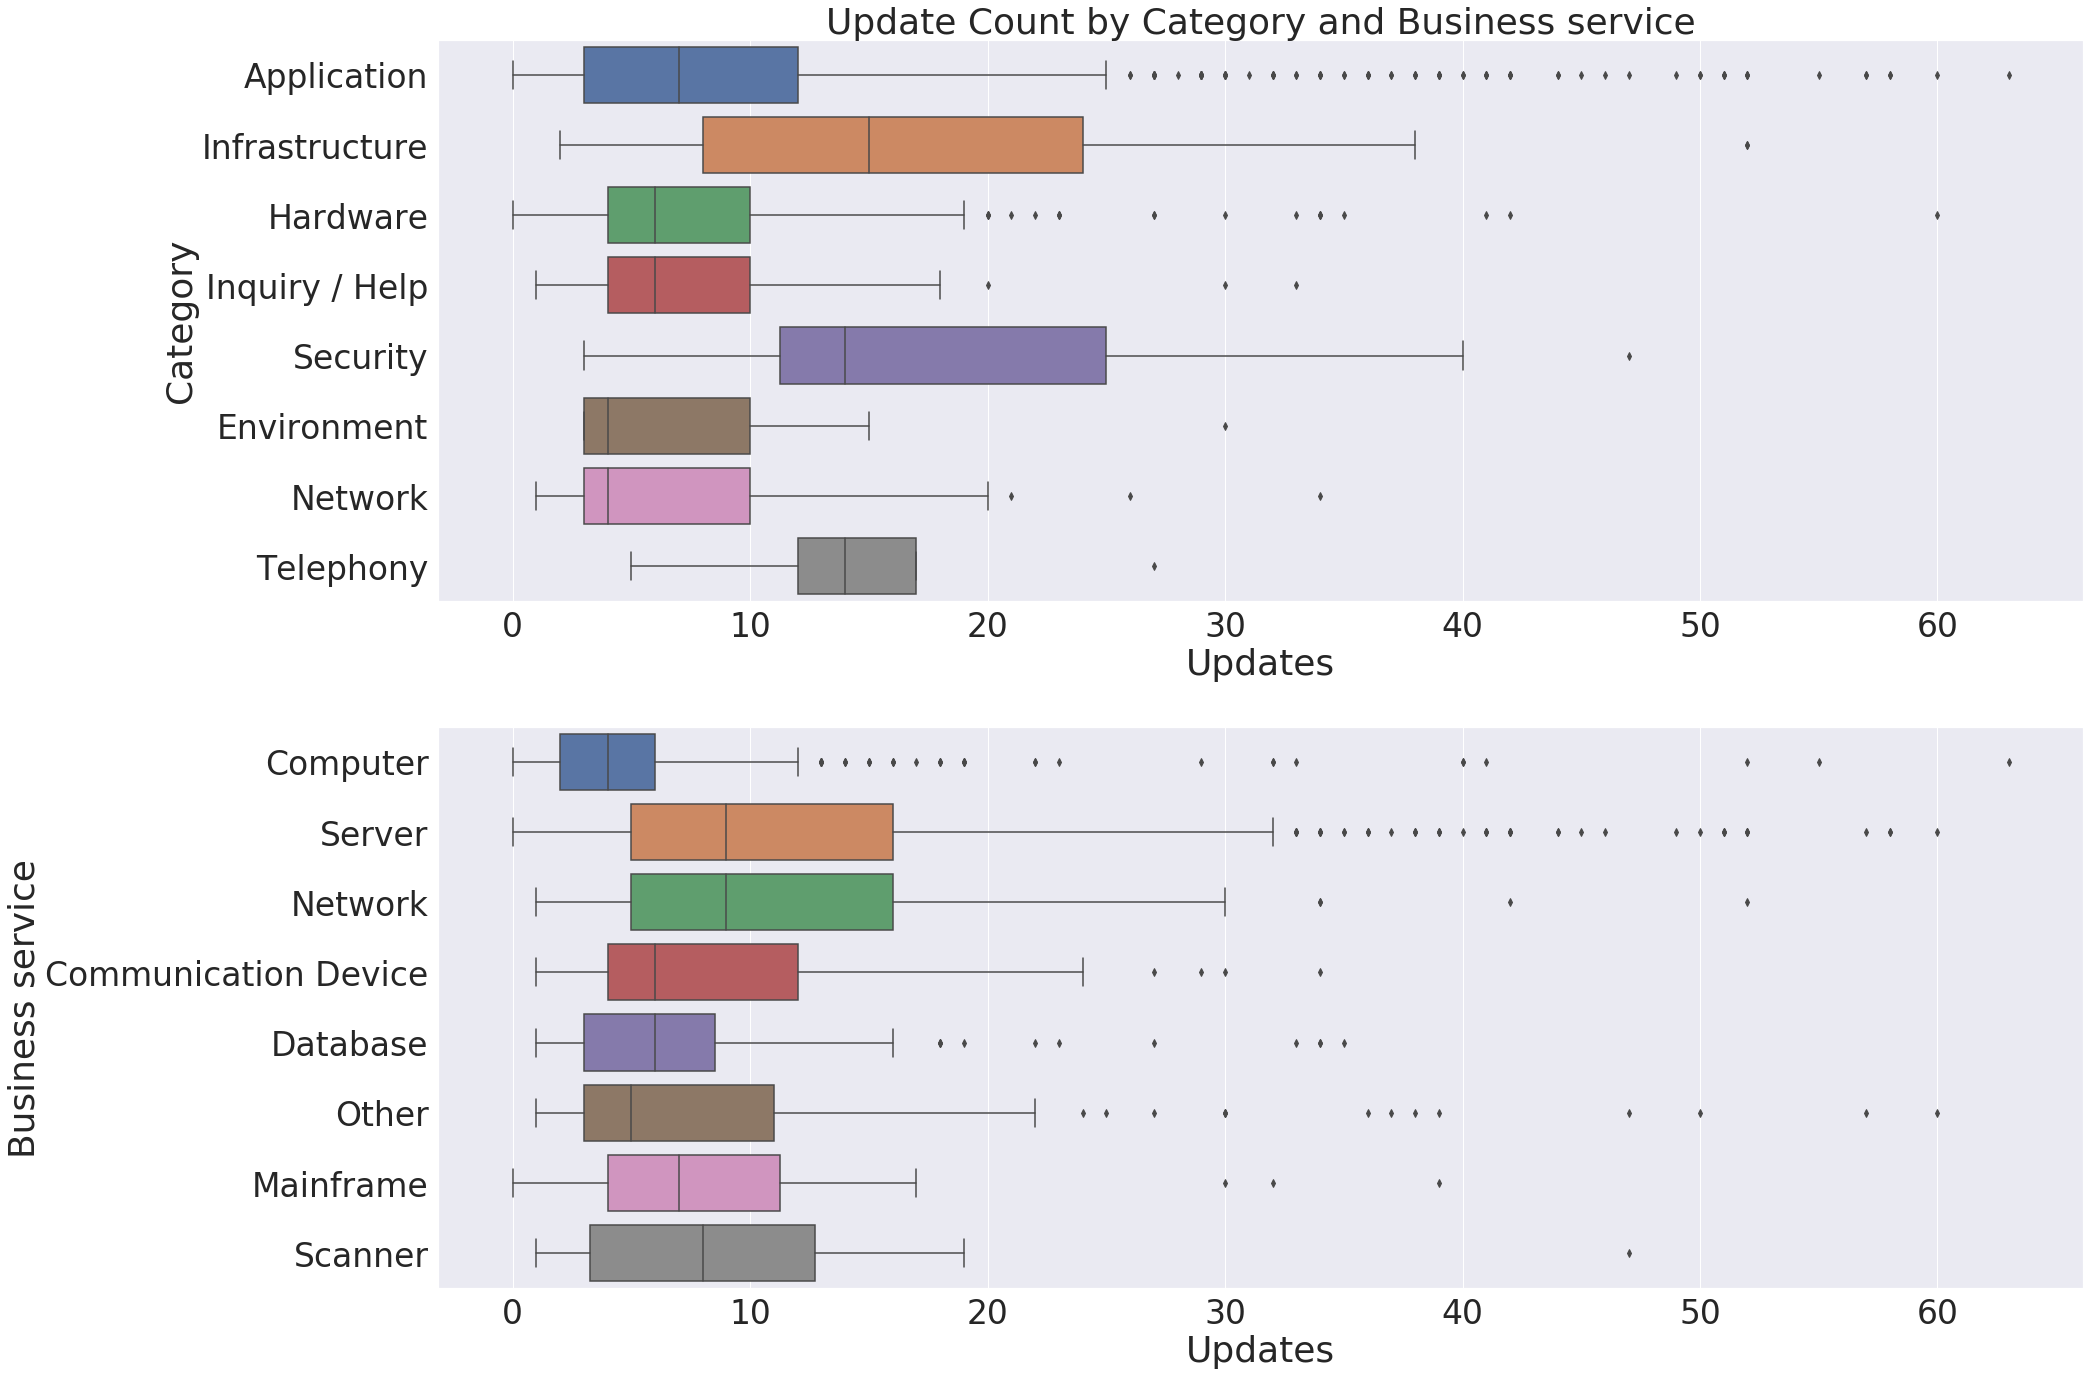

In [11]:
seaborn.set(font_scale=3)
fig, ax = plt.subplots(2,1)
plt.subplots_adjust(wspace=.5, hspace=.2)
fig.set_figwidth(30)
fig.set_figheight(20)
g1 = seaborn.boxplot('Updates', 'Category', data=data, ax=ax[0])
g1.set_title('Update Count by Category and Business service')
g2 = seaborn.boxplot('Updates', 'Business service', data=data, ax=ax[1])
plt.savefig("UpdatesByCat-Service.png")

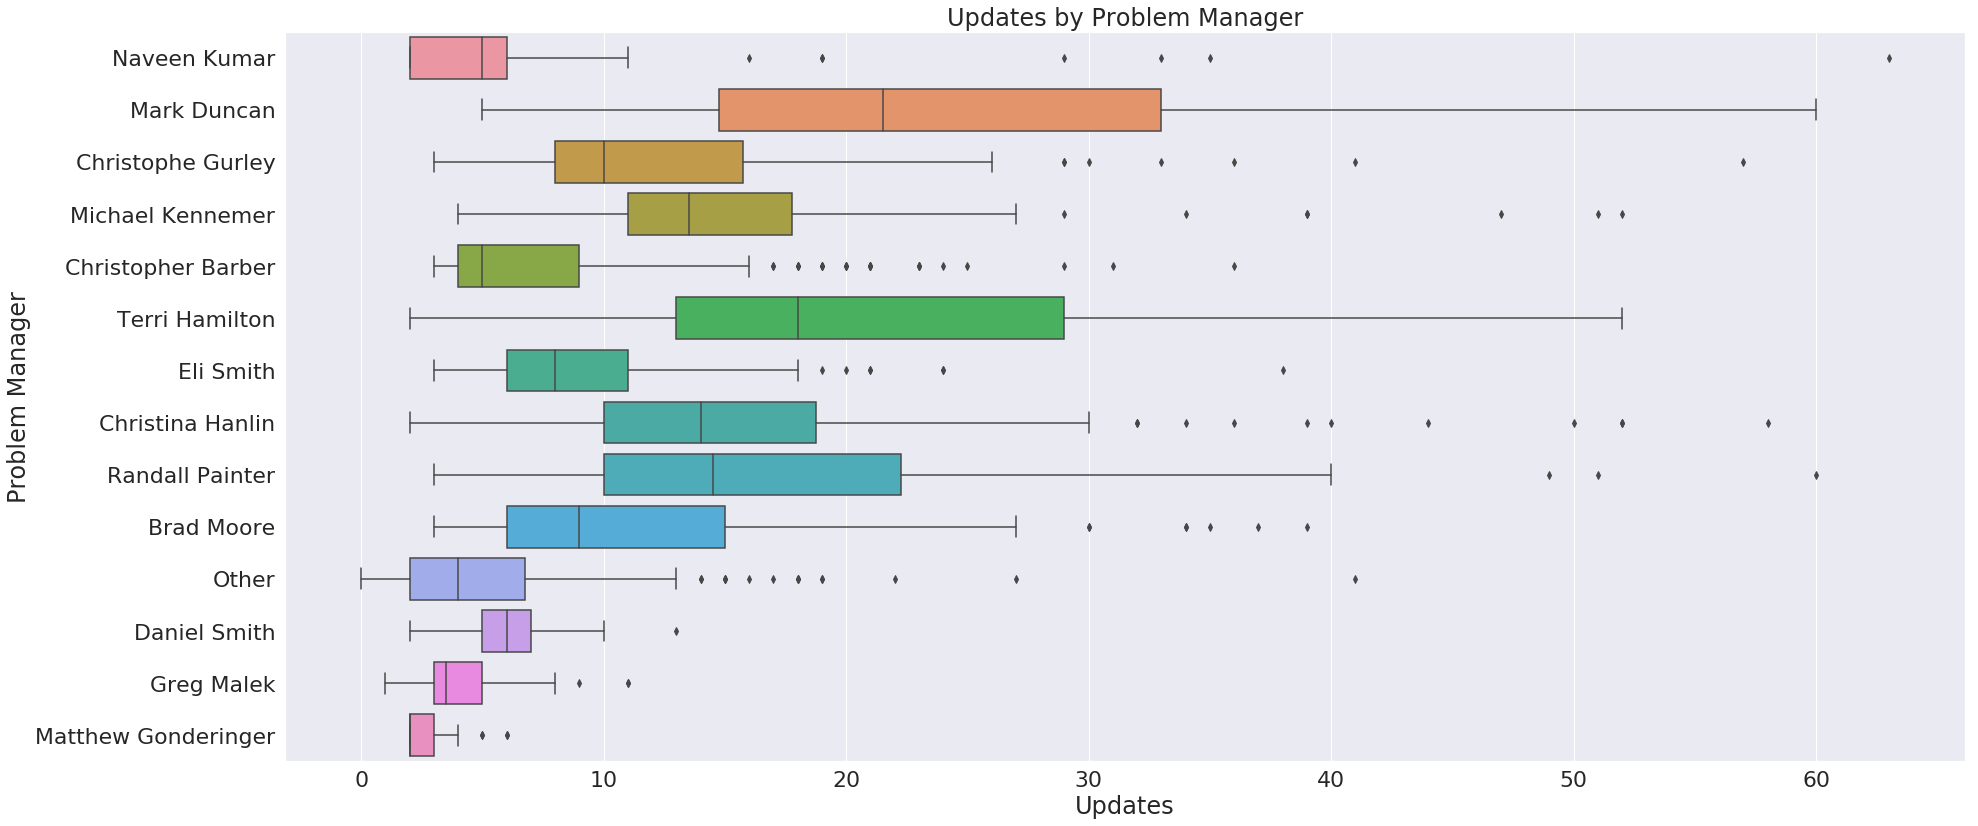

In [13]:
seaborn.set(font_scale=2)
fig, ax = plt.subplots()
plt.subplots_adjust(wspace=.5, hspace=.2)
fig.set_figwidth(28)
fig.set_figheight(12)
g = seaborn.boxplot('Updates', 'Problem Manager', data=data)
# g.set_xscale('log')
plt.title('Updates by Problem Manager')
plt.savefig("UpdatesByManager.png")

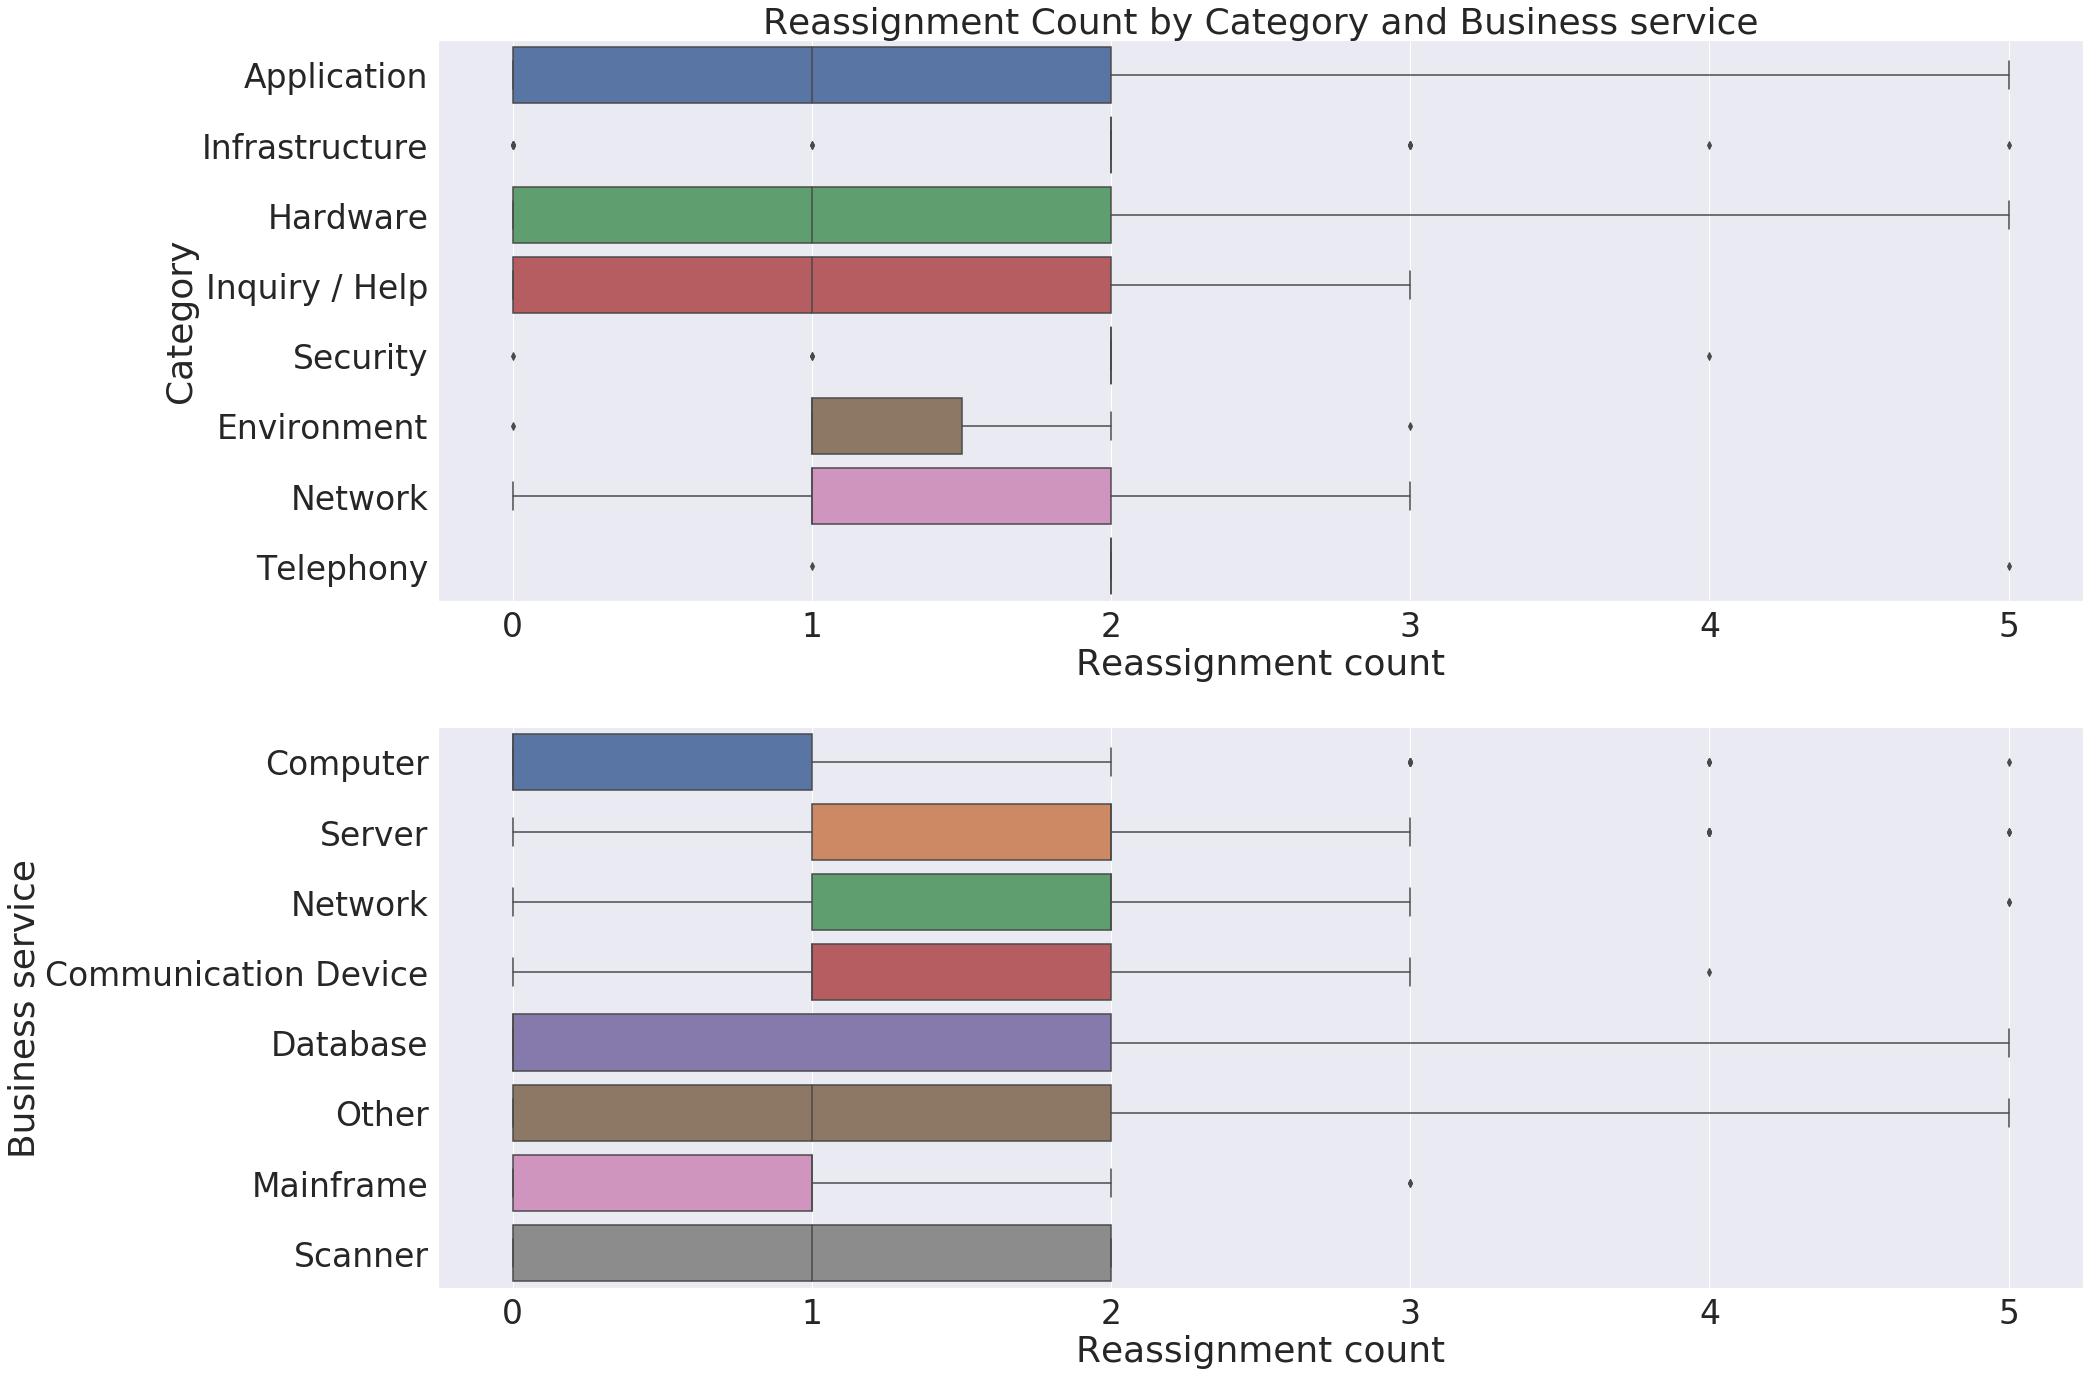

In [12]:
seaborn.set(font_scale=3)
fig, ax = plt.subplots(2,1)
plt.subplots_adjust(wspace=.5, hspace=.2)
fig.set_figwidth(30)
fig.set_figheight(20)
g1 = seaborn.boxplot('Reassignment count', 'Category', data=data, ax=ax[0])
g1.set_title('Reassignment Count by Category and Business service')
g2 = seaborn.boxplot('Reassignment count', 'Business service', data=data, ax=ax[1])
plt.savefig("ReassignCountByCat-Service.png")

In [38]:
catbytime = pd.crosstab(index=data["Category"], 
                          columns=data["Created Time"])
print(catbytime)

print(chisquare(catbytime))

stats.chi2_contingency(catbytime)

Created Time  afternoon  evening  morning  night
Category                                        
Application         598      102      275    147
Hardware            145       38      103     59
Power_divergenceResult(statistic=array([276.1897712 ,  29.25714286,  78.26455026,  37.59223301]), pvalue=array([5.08078722e-62, 6.33821485e-08, 9.01247968e-19, 8.71909771e-10]))


(13.57088124312493,
 0.0035514540926518214,
 3,
 array([[568.26584867, 107.07566462, 289.10429448, 157.55419223],
        [174.73415133,  32.92433538,  88.89570552,  48.44580777]]))

In [ ]:
data['Problem Manager'].value_counts()

In [ ]:
seaborn.set(font_scale=2)

In [ ]:
fig, ax = plt.subplots(2,1)
plt.subplots_adjust(wspace=.5, hspace=.2)
fig.set_figwidth(20)
fig.set_figheight(15)
seaborn.barplot('Duration Mean', 'Business service', errwidth=0, data=data, ax=ax[0])
seaborn.barplot('Duration Mean', 'Category', errwidth=0, data=data, ax=ax[1])
# seaborn.barplot('Duration Mean', 'Problem Manager', errwidth=0, data=data, ax=ax[0,0])
# seaborn.barplot('Duration Mean', 'Assignment group', errwidth=0, data=data, ax=ax[1,0])
# seaborn.barplot('Duration Mean', 'Company', errwidth=0, data=data, ax=ax[2,0])
# seaborn.barplot('Duration Mean', 'Created Time', errwidth=0, data=data, ax=ax[2,1])

In [ ]:
fig, ax = plt.subplots(2,1)
plt.subplots_adjust(wspace=.5, hspace=.2)
fig.set_figwidth(20)
fig.set_figheight(15)
seaborn.barplot('Duration Mean', 'Problem Manager', errwidth=0, data=data, ax=ax[0])
seaborn.barplot('Duration Mean', 'Assignment group', errwidth=0, data=data, ax=ax[1])
# seaborn.barplot('Duration Mean', 'Company', errwidth=0, data=data, ax=ax[2,0])
# seaborn.barplot('Duration Mean', 'Created Time', errwidth=0, data=data, ax=ax[2,1])

In [ ]:
fig, ax = plt.subplots(1,1)
plt.subplots_adjust(wspace=.5, hspace=.2)
fig.set_figwidth(20)
fig.set_figheight(15)
seaborn.set_style("dark")
x1 = list(data[data['Category'] == 'Application']['Duration Mean'])
x2 = list(data[data['Category'] == 'Network']['Duration Mean'])
x3 = list(data[data['Category'] == 'Hardware']['Duration Mean'])
x4 = list(data[data['Category'] == 'Environment']['Duration Mean'])
x5 = list(data[data['Category'] == 'Security']['Duration Mean'])
x6 = list(data[data['Category'] == 'Infrastructure']['Duration Mean'])
x7 = list(data[data['Category'] == 'Inquiry / Help']['Duration Mean'])
x8 = list(data[data['Category'] == 'Telephony']['Duration Mean'])
x9 = list(data[data['Category'] == 'Other']['Duration Mean'])


# Assign colors for each airline and the names
colors = ['#0039A6', '#FF6319', '#6CBE45', '#996633', '#FCCC0A', '#EE352E', '#B933AD', '#00A1DE', '#00933C']
names = ['Application', 'Network', 'Hardware', 'Environment', 'Security', 
         'Infrastructure', 'Inquiry / Help', 'Telephony', 'Other']
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([x1, x2, x3, x4, x5, x6, x7, x8, x9], bins = int(180/30), normed=False,
         color = colors, label=names)

plt.legend()
plt.xlabel('Duration Mean')
plt.ylabel('Normalized Count')
plt.title('Duration by Category (Normed)')
plt.savefig("DurationByCategory.png")

In [ ]:
fig, ax = plt.subplots(1,1)
plt.subplots_adjust(wspace=.5, hspace=.2)
fig.set_figwidth(20)
fig.set_figheight(15)
seaborn.set_style("dark")
x1 = list(data[data['Category'] == 'Application']['Reassignment count'])
x2 = list(data[data['Category'] == 'Network']['Reassignment count'])
x3 = list(data[data['Category'] == 'Hardware']['Reassignment count'])
x4 = list(data[data['Category'] == 'Environment']['Reassignment count'])
x5 = list(data[data['Category'] == 'Security']['Reassignment count'])
x6 = list(data[data['Category'] == 'Infrastructure']['Reassignment count'])
x7 = list(data[data['Category'] == 'Inquiry / Help']['Reassignment count'])
x8 = list(data[data['Category'] == 'Telephony']['Reassignment count'])
x9 = list(data[data['Category'] == 'Other']['Reassignment count'])


# Assign colors for each airline and the names
colors = ['#0039A6', '#FF6319', '#6CBE45', '#996633', '#FCCC0A', '#EE352E', '#B933AD', '#00A1DE', '#00933C']
names = ['Application', 'Network', 'Hardware', 'Environment', 'Security', 
         'Infrastructure', 'Inquiry / Help', 'Telephony', 'Other']
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([x1, x2, x3, x4, x5, x6, x7, x8, x9], bins = int(180/30), normed=False,
         color = colors, label=names)

plt.legend()
plt.xlabel('Reassignment Count')
plt.ylabel('Count')
plt.title('Reassignment Count')
plt.savefig("ReassignmentCountByCategory.png")

In [ ]:
fig, ax = plt.subplots(1,1)
plt.subplots_adjust(wspace=.5, hspace=.2)
fig.set_figwidth(20)
fig.set_figheight(15)
seaborn.set_style("dark")

categories = ['Application', 'Network', 'Hardware', 'Environment', 'Security', 
         'Infrastructure', 'Inquiry / Help', 'Telephony']

colors = ['#0039A6', '#FF6319', '#6CBE45', '#996633', '#FCCC0A', '#EE352E', '#B933AD', '#00A1DE', '#00933C']

for cat in categories:
    # Subset to the airline
    subset = data[data['Category'] == cat]
    
    # Draw the density plot
    seaborn.distplot(subset['Updates'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = cat)
    
# Plot formatting


# Assign colors for each airline and the names
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names

plt.legend(prop={'size': 16}, title = 'Category')
plt.xlabel('Num Updates')
plt.ylabel('Count')
plt.title('Count of Updates by Category')
plt.savefig("UpdatesByCategory.png")

In [ ]:
fig, ax = plt.subplots(1,1)
plt.subplots_adjust(wspace=.5, hspace=.2)
fig.set_figwidth(20)
fig.set_figheight(15)
seaborn.set_style("dark")

categories = ['Application', 'Network', 'Hardware', 'Environment', 'Security', 
         'Infrastructure', 'Inquiry / Help', 'Telephony']

colors = ['#0039A6', '#FF6319', '#6CBE45', '#996633', '#FCCC0A', '#EE352E', '#B933AD', '#00A1DE', '#00933C']

for cat in categories:
    # Subset to the airline
    subset = data[data['Category'] == cat]
    
    # Draw the density plot
    seaborn.distplot(subset['Reassignment count'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = cat)
    
# Plot formatting


# Assign colors for each airline and the names
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names

plt.legend(prop={'size': 16}, title = 'Category')
plt.xlabel('Num Reassignments')
plt.ylabel('Count')
plt.title('Reassignment Count by Category')
plt.savefig("ReassignCountByCategory.png")

In [ ]:
fig, ax = plt.subplots(3,2)
plt.subplots_adjust(wspace=.5, hspace=.2)
fig.set_figwidth(20)
fig.set_figheight(15)
seaborn.set_style("dark")
seaborn.violinplot('Duration Mean', 'Business service', errwidth=0, data=data, ax=ax[0,0])
seaborn.violinplot('Duration Mean', 'Category', errwidth=0, data=data, ax=ax[0,1])
seaborn.violinplot('Duration Mean', 'Problem Manager', errwidth=0, data=data, ax=ax[1,0])
seaborn.violinplot('Duration Mean', 'Assignment group', errwidth=0, data=data, ax=ax[1,1])
seaborn.violinplot('Duration Mean', 'Company', errwidth=0, data=data, ax=ax[2,0])
seaborn.violinplot('Duration Mean', 'Created Time', errwidth=0, data=data, ax=ax[2,1])

/home/mithrandir/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


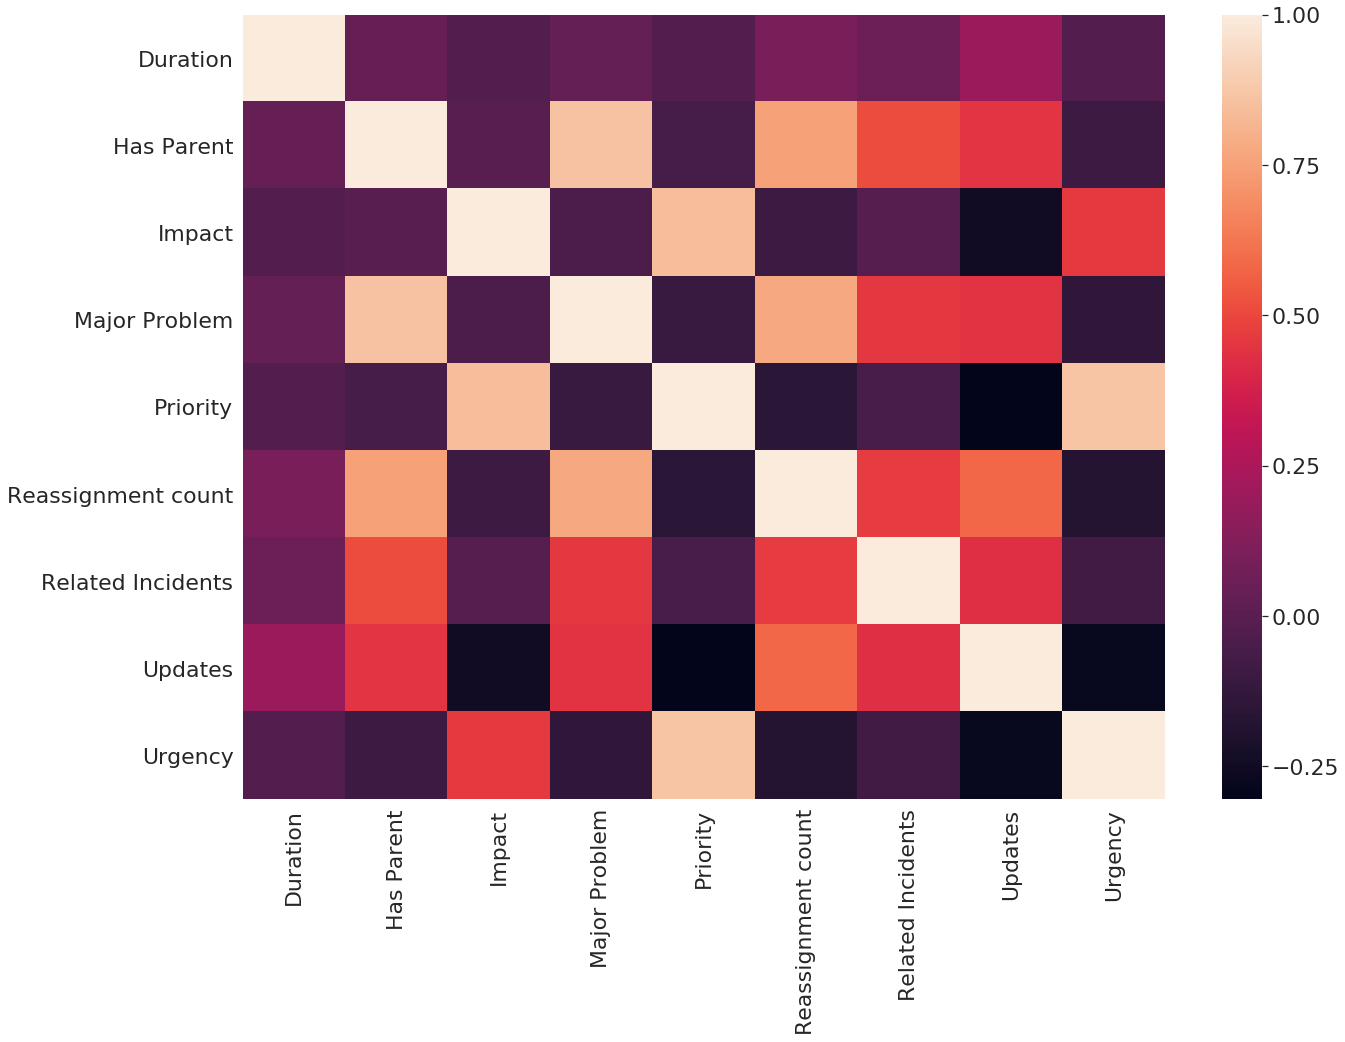

In [23]:
corrdata = data.drop('Business duration', axis=1)
fig, ax = plt.subplots(1,1)
plt.subplots_adjust(wspace=.5, hspace=.2)
fig.set_figwidth(20)
fig.set_figheight(15)
corr = corrdata.corr()
seaborn.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.savefig("CorrelationHeatmap.png")

In [17]:
df = pd.read_csv('problems_2categories_atprobcreation.csv')
# X = df.drop('Category', axis=1).values
# X

In [18]:
# le = preprocessing.LabelEncoder()
# for col in range(len(X[0])):
#     X[:,col] = le.fit_transform(X[:,col])
X = df.drop('Category', axis=1)
X = pd.get_dummies(X, columns=["'Assignment group'", "'Business service'",
                               'Company', "'Created Time'", "'Created by'", 
                               "'Opened by'", 'Type'])
y = df['Category'].values
y

array(['Application', 'Application', 'Application', ..., 'Hardware',
       'Hardware', 'Hardware'], dtype=object)

Adjusted_Rand: 0.02554385376701758
Silhouette: 0.22078368742691057
Total explained variance: 0.5823567161761686


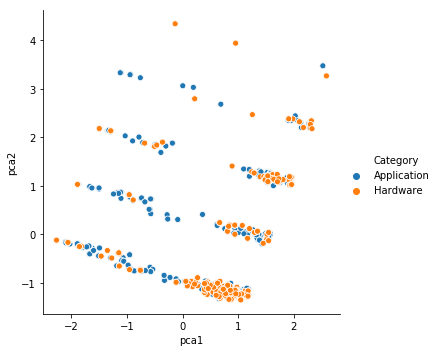

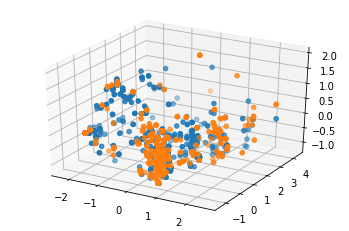

In [21]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import *
from matplotlib import pyplot
from sklearn.metrics import adjusted_rand_score, silhouette_score

pca = PCA(n_components=4)

# features = df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ]
Xfit = pca.fit_transform(X)
df['pca1'] = Xfit[ : , 0]
df['pca2'] = Xfit[ : , 1]
df['pca3'] = Xfit[ : , 2]
df['pca4'] = Xfit[ : , 3]

model = KMeans(n_clusters=4)
model.fit(df[['pca1', 'pca2', 'pca3']])
print('Adjusted_Rand:', adjusted_rand_score(model.labels_, df.Category))
print('Silhouette:', silhouette_score(X, model.labels_))
print('Total explained variance:', sum(pca.explained_variance_ratio_))
seaborn.relplot(x='pca1', y='pca2', hue='Category', data = df)
fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')

x = df['pca1']
y = df['pca2']
z = df['pca3']


for name, group in df.groupby('Category'):
    ax.scatter(group.pca1, group.pca2, group.pca3, label=name)
    
pyplot.show()

In [24]:
print(model.labels_)

[0 1 2 ... 1 1 1]
